#### URL 이미지 불러오기

sunflower 0.674
sunflower 0.521
sunflower 0.62
Sun hat 0.714
sunflower 0.501
sunflower 0.714
person 0.538


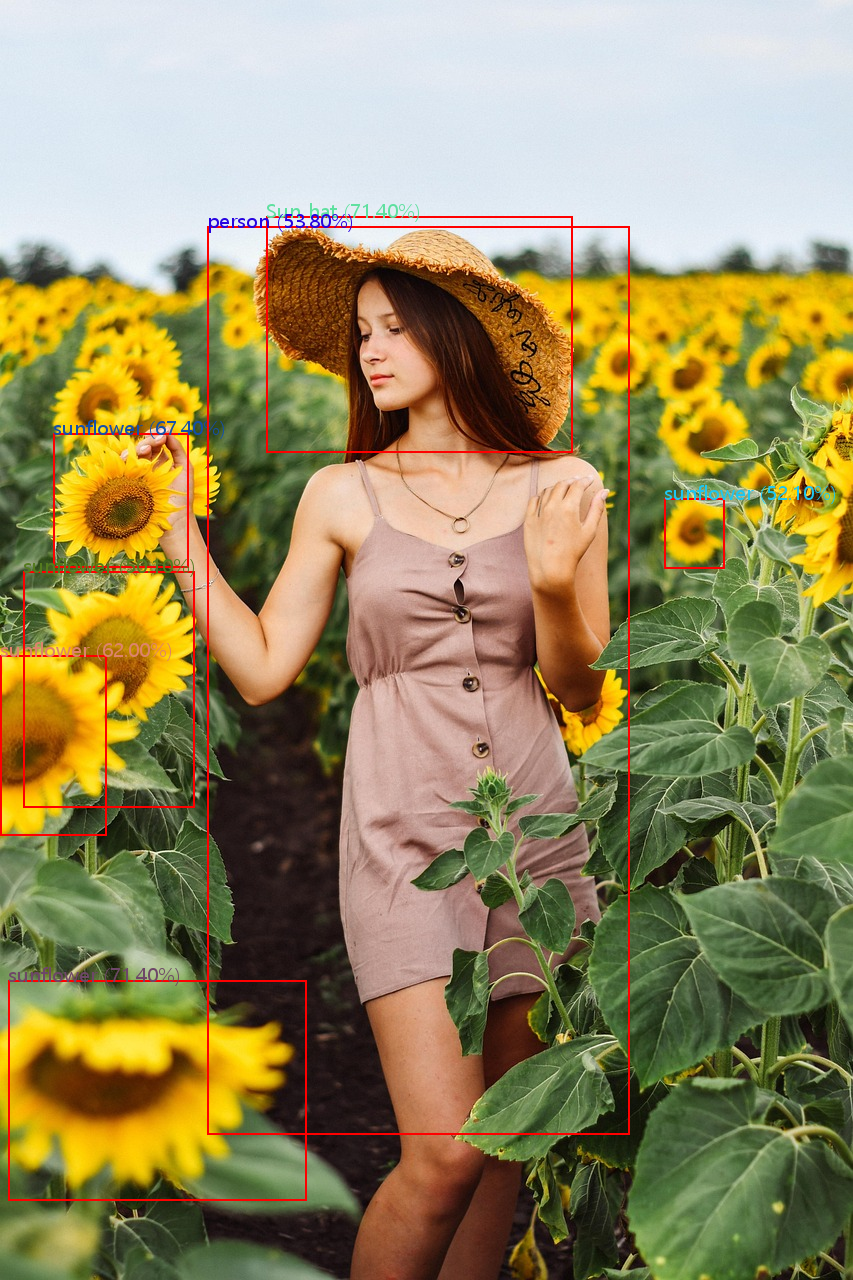

In [14]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO

IMAGE_URL = "https://cdn.pixabay.com/photo/2023/12/13/22/29/young-woman-8447841_1280.jpg"


def random_color():
    # 랜덤한 RGB 색상 튜플 반환
    import random
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) 


def get_font():
    # OS별로 적절한 폰트 객체 반환 (한글 지원)
    from PIL import ImageFont
    import platform
    
    font_size = 20
    
    try:
        if platform.system() == "Windows":
            return ImageFont.truetype("malgun.ttf", font_size)
        elif platform.system() == "Darwin":  # macOS
            return ImageFont.truetype("AppleGothic.ttf", font_size)
        else:  # Linux      
            return ImageFont.load_default(size=font_size)
    except IOError:
        # 폰트 파일이 없을 경우 기본 폰트 사용
        return ImageFont.load_default(size=font_size)
    

def request_objects(url):

    endpoint = "https://7ai015-vision.cognitiveservices.azure.com/computervision/imageanalysis:analyze?api-version=2024-02-01&features=Objects"

    headers = {
        "Ocp-Apim-Subscription-Key":"EpqbkwbuaMO7g1gmWgsx8mGN2x8yLRIlt7MxK1TUjXgCZnzAtNYCJQQJ99BGACYeBjFXJ3w3AAAFACOGlNDi"
    }
    
    body = {
        "url": url
    }

    response = requests.post(endpoint, headers=headers, json=body)

    # 응답 상태 코드가 200인지 확인한다. 
    if response.status_code != 200:
        print("Error: ", response.status_code, response.text)
        return None

    # 응닫 받은 데이터에서 JSON 데이터를 추출한다.
    response_json = response.json()

    return response_json


def draw_image(url, data):
    # 이미지를 받아온다. 
    # request.get("이미지 URL") = 브라우저에서 이미지 경로 열기
    image_response = requests.get(url)

    # 이미지를 열어준다.
    image = Image.open(BytesIO(image_response.content))

    # 이미지 위에 사각형 그리기. 
    draw = ImageDraw.Draw(image)

    # 추출된 JSON 데이터에서 ObjectResult 객체를 가져온다.
    block_list = data['objectsResult']['values']

    for block in block_list:

        color = random_color()

        # ObjectResult 객체에서 BoundingBox 객체를 가져온다.
        bounding_box = block['boundingBox']
        tag = block['tags'][0]
        
        x, y, w, h = bounding_box['x'], bounding_box['y'], bounding_box['w'], bounding_box['h']

        # tags의 첫 번째 요소에서 이름 정보와 confidence 정보를 가져온다.
        name = tag['name']
        confidence = tag['confidence'] 

        formatted_text = "{} ({:.2f}%)".format(name, confidence *100)

        # 좌측 상단, 우측 하단
        # BoundingBox 객체에서 좌표를 가져와서 사각형을 그린다.
        draw.rectangle([(x, y), (x + w, y + h)], outline='red', width=2)
        draw.text((x, y - 20),  formatted_text, fill=color, font=get_font())
        print(name, confidence)

    return image

response_json2 = request_objects(IMAGE_URL)
draw_image(IMAGE_URL, response_json2)